Собирает в единую табличку ссылки на файлы сырых скачанных данных

In [4]:
from pathlib import Path
import pandas as pd
import json
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [59]:
root = Path('../../../data/NER/')
data_root = root / 'raw'
processed_data_root = root / 'processed'

# Add data from grouple manga main page

In [6]:
# data example
data = json.load(open(data_root / 'grouple_manga_pages/0.json'))
data

{'url': 'https://mintmanga.live/naruto_dodzinsi__novogodnii_festival',
 'manga_type': 'Сингл',
 'title': 'Наруто додзинси: Новогодний фестиваль',
 'description': 'Фестиваль! Скрытый лист отмечает праздник! Когда всюду лотки сугощениями, смех весёлой толпы синоби в разноцветных кимоно, а наверху,бросая ослепительно яркие цвета и вспышки, взрывается фейерверк - вамвдруг захотелось отдохнуть от шума и понаблюдать за этим изумительнымзрелищем где-нибудь в укромном месте. Хорошо, что Саске знает где оно...Додзинси Саске х Наруто.',
 'comments': ['О боже мой! Я даже боюсь представить что там, не говоря о том, чтобы читать!',
  'симпотичненько и рисовка радует глаза!',
  'Рисовка мила, да. Но вот эта немощность... Сначала, конечно, удивилась, но потом понравилось. И эти слова в конце... Лучше бы вообще молчали. Все впечатление испортило.А еще, тут яоя нет.',
  'Тут можно и без яоя)Рисовка очень красивая. Все так мило) Но ограничение ни к чему.',
  'Присоединяюсь к предыдущим коментам - ограни

In [45]:
# data example
data = json.load(open(data_root / 'grouple_manga_volumes/0.json'))
# data

# Create url to page_file and volume_file

In [43]:
url2page = dict()
path = data_root / 'grouple_manga_pages/'

for file in tqdm(os.listdir(path)):
    data = json.load(open(path / file))
    url_title = data['url'].split('/')[-1]
    url2page[url_title] = file

In [49]:
# get several volumes per one manga
url2volumes = defaultdict(lambda: [])
path = data_root / 'grouple_manga_volumes/'

for file in tqdm(os.listdir(path)):
    if not file.endswith('.json'):
        continue
    data = json.load(open(path / file))
    url_title = data['url'].split('/')[-3]
    url2volumes[url_title].append(file)


# merge volumes into one file
url2volume = defaultdict(lambda: None)
merged_files_path = data_root / 'grouple_merged_volumes/'

for i, (url_title, vols) in tqdm(enumerate(manga2volumes_files.items()), total=len(manga2volumes_files)):
    obj = {'comments': [],
           'links': []}
    for vol in vols:
        data = json.load(open(path / vol))
        obj['comments'] += data['comments']
        obj['links'] += data['links']
    obj['url'] = data['url']
    
    filename = f'{i}.json'
    url2volume[url_title] = filename
    json.dump(obj, open(merged_files_path / filename, 'w'))

In [56]:
# Create df with links to files

records = []
for url in tqdm(list(url2page.keys())):
    page = url2page[url]
    volumes = url2volume[url]
    records.append((url, page, volumes))

df = pd.DataFrame.from_records(records, columns=['url', 'page_file', 'volumes_data_file'])

In [60]:
df.to_csv(processed_data_root / 'merged_grouple_data.csv', index=False)

# Plotsurl2volume

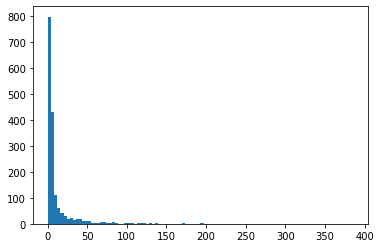

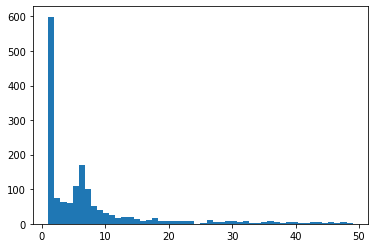

In [63]:
# How many volumes loaded per manga
counts = list(map(len, url2volumes.values()))

counts = pd.Series(list(manga2volumes.values()))
_ = plt.hist(counts, bins=100)
plt.show()

_ = plt.hist(counts[counts < 50], bins=50)
plt.show()